# 회귀 예측 모델 실습

- 데이터 파일 : `auto-mpg.csv` 

###  컬럼 정보 
- MPG (miles per gallon - 연비)
- cylinders (실린더 갯수)
- engine displacement (inches 배기량)
- horsepower (마력)
- vehicle weight (lbs. 무게)
- time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간)
- model year 
- origin of car (1. American,   2. European,   3. Japanese).
- Also provided are the car labels (types)

## [목표]
- mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

# 라이브러리, 데이터 로딩

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# datas_ml\auto-mpg.csv
df = pd.read_csv('datas_ml/auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
df['name'].value_counts()

name
amc matador        5
toyota corolla     5
ford pinto         5
toyota corona      4
amc hornet         4
                  ..
ford mustang gl    1
vw pickup          1
dodge rampage      1
ford ranger        1
chevy s-10         1
Name: count, Length: 301, dtype: int64

In [6]:
df['name'].nunique()

301

# X, y 데이터 분리

In [7]:
df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

In [9]:
# 예측할 정답
y = df['mpg']

- name은 제외

In [11]:
# X = df.loc[:, 'cyl':'origin']

- name을 넣을 경우

In [20]:
X = df.drop('mpg', axis=1)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
X.head()

,cyl,displ,hp,weight,accel,yr,origin,name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
# name 컬럼을  onehotencoing 변환하기
# remainder='passthrough' 나머지는 통과시켜라는 듯

ct = ColumnTransformer([ ('encoder', OneHotEncoder(), [7]) ], remainder='passthrough')

In [24]:
X = ct.fit_transform(X)

# 학습용, 테스트용으로 분리

In [18]:
from sklearn.model_selection import train_test_split

In [25]:
# train : test => 8:2로 분할, 재현을 위핸 random seed => 7
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# 모델 학습

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model = lr_model = LinearRegression()

In [29]:
# 학습하기전의 회귀선의 기울기 상태
lr_model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [31]:
# 학습 수행
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 검증하기

In [32]:
y_pred = lr_model.predict(X_test)

In [33]:
y_pred

array([27.1206431 , 25.66205592, 16.66599566, 28.42379842, 25.68314143,
       26.33290274, 24.82090388, 25.27439803, 26.90825205, 29.33689652,
       27.66871767, 28.99319877, 27.46714436, 15.87284041, 13.19598526,
       20.3563785 , 26.39593516, 30.5632244 , 22.57529712, 19.3321585 ,
       28.03728571, 32.70138618, 14.06396997, 27.6648256 , 25.21760325,
       17.74999121, 13.09365038, 21.67601224, 14.91060321, 34.15277183,
       36.49974526, 32.29768947, 12.22769759,  7.03538039, 27.48861625,
       24.24129386, 27.12432797, 28.26381088, 16.30963187, 17.5975817 ,
       30.69069423, 15.90409385, 10.06618494, 25.978699  , 25.5094795 ,
       29.94989805, 24.85034582, 33.46171439, 28.07303837, 19.42169311,
       29.78116327, 27.74924819, 31.36294947, 15.43319491, 13.47580009,
       21.44498332, 16.86426006, 29.06406899, 14.95964303, 27.15683295,
       27.72787553, 15.98990082,  9.73648233, 34.07262417, 19.28287681,
       28.8641855 , 24.48739635, 28.25823255, 25.6546827 , 31.43

- RMSE 계산

In [34]:
np.sqrt(((y_test - y_pred)**2).mean()) # RMSE

np.float64(3.555646423043206)

- R2 score

In [35]:
# 결정계수 계산
lr_model.score(X_test, y_test)

0.7729188665788533

결정 계수 해석 : 

# 실제값과 모델예측 결과 시각화

In [36]:
df_test = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': y_pred
})


In [37]:
df_test

,y_test,y_pred
0,30.5,27.120643
1,23.8,25.662056
2,13.0,16.665996
3,24.2,28.423798
4,25.0,25.683141
...,...,...
74,34.7,31.560652
75,16.0,15.683659
76,32.9,31.647811
77,22.0,26.040645


In [38]:
# df_test 데이터 프레임 인덱스 reset하기
df_test = df_test.reset_index(drop=True) 

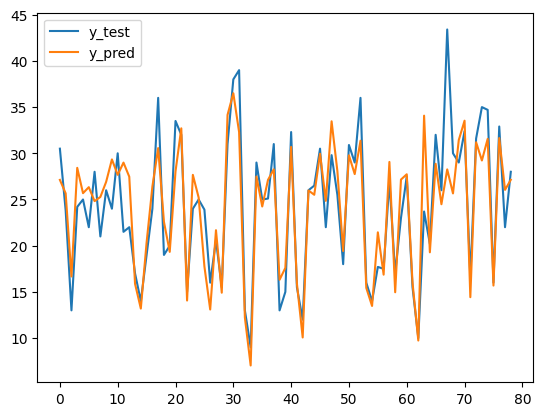

In [39]:
df_test.plot()
plt.show()